In [25]:
from openbabel import openbabel

In [26]:
from rdkit import Chem
from rdkit.Chem import rdBase
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import Crippen

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

In [28]:
from ast import literal_eval

In [29]:
def split(word):
    return[char for char in word]

In [30]:
def inchi(array):
    Smiles = array[0] 
    mol = Chem.MolFromSmiles(Smiles)
    dummy = Chem.inchi.MolToInchiKey(mol)#split at first layer (contains everything but stereochemical info)
    characters = split(dummy)
    dummy = ''
    position = 0
    for i in range(len(characters)):
        if characters[i] == '-':
            position = i
            break
    for i in range(position):
        dummy += characters[i]
    return(dummy)

In [31]:
def inchi_generations(array):
    Smiles = array[1]
    mol = Chem.MolFromSmiles(Smiles)
    dummy = Chem.inchi.MolToInchiKey(mol)#split at first layer (contains everything but stereochemical info)
    characters = split(dummy)
    dummy = ''
    position = 0
    for i in range(len(characters)):
        if characters[i] == '-':
            position = i
            break
    for i in range(position):
        dummy += characters[i]
    return(dummy)

## Nucleoside matching (with degeneracy)

In [32]:
NonDegenerateCHNOpath = './NonDegenerateNucleosideAnalogueData/CHNO_final.tsv'
NonDegenerateCHOpath = './NonDegenerateNucleosideAnalogueData/CHO_final.tsv'

In [33]:
FormoseAmmpath = './NetworkData/formose_amm_output.tsv'
Formosepath = './NetworkData/formose_output.tsv'
GlucoseAmmpath = './NetworkData/glucose_amm_output.tsv'
Glucosepath = './NetworkData/glucose_degradation_output.tsv'
PyruvicAcidpath = './NetworkData/pyruvic_output.tsv'

In [34]:
OriginalFormoseAmmpath = './OriginalNetworkData/formose_amm_output.tsv'
OriginalFormosepath = './OriginalNetworkData/formose_output.tsv'
OriginalGlucoseAmmpath = './OriginalNetworkData/glucose_amm_output.tsv'
OriginalGlucosepath = './OriginalNetworkData/glucose_degradation_output.tsv'
OriginalPyruvicAcidpath = './OriginalNetworkData/pyruvic_output.tsv'

In [35]:
DegenerateCHNOpath = './DegenerateNucleosideAnalogueData/Prepped_CHNO_degenerate.tsv'
DegenerateCHOpath = './DegenerateNucleosideAnalogueData/Prepped_CHO_degenerate.tsv'

In [36]:
def apply_inchi(path, title):
    data = pd.read_csv(path, sep='\t')
    data['Inchi'] = data.apply(inchi, axis=1, raw=True, result_type='expand')
    data.to_csv(f'{title}', header=None, index=None, sep='\t', mode='a')
    return(data)

In [37]:
def apply_full_inchikey(path, title):
    data = pd.read_csv(path, sep='\t')
    data['Full Inchi'] = data.apply(full_inchi, axis=1, raw=True, result_type='expand')
    data.to_csv(f'{title}', header=None, index=None, sep='\t', mode='a')
    return(data)

In [38]:
def find_struct_isomers(degenerate_set, nondegenerate_set):
    degenerate_data = pd.read_csv(degenerate_set, sep='\t')
    nondegenerate_data = pd.read_csv(nondegenerate_set, sep='\t')
    unique_isomers = []
    for i in range(len(nondegenerate_data['Inchi'])):
        unique_isomers.append(nondegenerate_data['Inchi'][i])
    
    struct_isomers = []
    for i in range(len(unique_isomers)):
        struct_isomers.append([])
    print(1) 
    for i in range(len(degenerate_data['Inchi'])):
        value = unique_isomers.index(degenerate_data['Inchi'][i])
        struct_isomers[value].append(degenerate_data['Canonical Smiles'][i])
        if i%10000 == 0:
            print(i)
    
    data = {'Inchi': unique_isomers, 'All Canonical Smiles': struct_isomers}
    df = pd.DataFrame(data)
    return(df)

In [39]:
#%%time
#df = find_struct_isomers(DegenerateCHOpath, NonDegenerateCHOpath)

In [40]:
#data1 = pd.read_csv('./NonDegenerateNucleosideAnalogueData/CHNO_StructIsomers.tsv', sep='\t')
#data2 = pd.read_csv('./NonDegenerateNucleosideAnalogueData/CHO_StructIsomers.tsv', sep='\t')

In [41]:
#CHNO_codes = []
#CHNO_smiles = []
#for i in range(len(data1['Inchi'])):
    #CHNO_codes.append(data1['Inchi'][i])
    #CHNO_smiles.append(literal_eval(data1['AllSmiles'][i]))

In [42]:
#CHO_codes = []
#CHO_smiles = []
#for i in range(len(data2['Inchi'])):
    #CHO_codes.append(data2['Inchi'][i])
    #CHO_smiles.append(literal_eval(data2['AllSmiles'][i]))

In [43]:
#%%time
#for i in range(len(CHO_codes)):
    #if CHO_codes[i] in CHNO_codes:
        #value = CHNO_codes.index(CHO_codes[i])
        #for j in range(len(CHO_smiles[i])):
            #if CHO_smiles[i][j] not in CHNO_smiles[value]:
                #CHNO_smiles[value].append(CHO_smiles[i][j])
    #else:
        #CHNO_codes.append(CHO_codes[i])
        #CHNO_smiles.append(CHO_smiles[i])
    #if i%1000 == 0:
        #print(i)

In [44]:
#nucleoside_data = {'Inchi': CHNO_codes, 'All Smiles': CHNO_smiles}
#df = pd.DataFrame(nucleoside_data)
#df.to_csv('Nucleoside_Structisomers.tsv', header=None, index=None, sep='\t', mode='a')

In [45]:
# def find_matches(library_set, test_set, title):
#     library_data = pd.read_csv(library_set, sep='\t')
#     test_data = pd.read_csv(test_set, sep='\t')
#     print(3)
#     test_codes = []
#     for i in range(len(test_data['Inchi'])):
#         test_codes.append(test_data['Inchi'][i])
#     library_codes = []
#     for i in range(len(library_data['Inchi'])):
#         library_codes.append(library_data['Inchi'][i])
#     print(4)
#     matches = []
#     library_indexes = []
#     for i in range(len(library_codes)):
#         if library_codes[i] in test_codes:
#             matches.append(library_codes[i])
#             library_indexes.append(i)
#     print(5)
#     print(matches)
#     library_smiles = []
#     matches_generations = []
#     for i in range(len(matches)):
#         library_smiles.append(library_data['Smiles'][library_indexes[i]])
#         for j in range(len(test_data['Inchi'])):
#             if matches[i] == test_data['Inchi'][j]:
#                 matches_generations.append(test_data['Generation'][j])
#     matches_data = {'Generation': matches_generations, 'Smiles': library_smiles}
#     #matches_data = {'Generation': matches_generations, 'Smiles': test_smiles, 'Inchi': matches}
#     library_test_matches = pd.DataFrame(matches_data)
#     library_test_matches.to_csv(f'{title}', header=None, index=None, sep='\t', mode='a')
#     return(library_test_matches)

In [46]:
# %%time
# df = find_matches(CHNOpath, FormoseAmmpath, 'FormoseAmmCHNO.tsv')

In [58]:
def isomer_linker(matchespath, nucleoside_library, title):
    matches = pd.read_csv(matchespath, sep='\t')
    nucleoside_isomers = pd.read_csv(nucleoside_library, sep='\t')
    nucleoside_codes = []
    nucleoside_smiles = []
    for i in range(len(nucleoside_isomers['Inchi'])):
        nucleoside_codes.append(nucleoside_isomers['Inchi'][i])
        nucleoside_smiles.append(literal_eval(nucleoside_isomers['All Smiles'][i]))
    gen_data = []
    smiles = []
    print('Checkpoint')
    for i in range(len(matches['Inchi'])):
        value = nucleoside_codes.index(matches['Inchi'][i])
        for j in range(len(nucleoside_smiles[value])):
            gen_data.append(matches['Generation'][i])
            smiles.append(nucleoside_smiles[value][j])
    data = {'Generation': gen_data, 'Smiles': smiles}
    df = pd.DataFrame(data)
    df.to_csv(f'{title}MatchesStructIsomers.tsv', header=None, index=None, sep='\t', mode='a')
    return(df)

In [76]:
%%time
df = isomer_linker('./MatchesFiles/GlucoseAmmMatches.tsv', './Nucleoside_Structisomers.tsv', 'GlucoseAmm')

Checkpoint
CPU times: user 16.4 s, sys: 123 ms, total: 16.5 s
Wall time: 16.6 s


In [61]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gspec

In [62]:
from rdkit.Chem.rdMolDescriptors import CalcMolFormula
from rdkit.Chem.Descriptors import ExactMolWt
from rdkit.Chem import MolFromSmiles

In [63]:
def count_struct_isomers(smiles_list):
	dict_isomers = {}
	dict_smiles = {}
	dict_exactwt = {}
	
	for mol_smiles in smiles_list:
		mol = MolFromSmiles(mol_smiles)
		formula = CalcMolFormula(mol)
		weight = ExactMolWt(mol)
		if formula in dict_isomers.keys():
			dict_isomers[formula] += 1 # increase the isomer count by 1
			dict_smiles[formula].append(mol_smiles) # These are MOD's smiles, not RDKit's
			dict_exactwt[weight] += 1 # Weight calculated by RDKit, not MOD's in-built
		else:
			dict_isomers[formula] = 1
			dict_smiles[formula] = [mol_smiles]
			dict_exactwt[weight] = 1
	return dict_exactwt # modify this as per your needs

In [64]:
def plot_lollipop(exactwt_freq_dict, gen, shared_axis=True):
	"""
	Make a (shared axis) lollipop plot of the spectrum.
	"""
	# which marker (dot) color to use for which generation
	gen_colors = ["blue", "red", "cyan", "green", "magenta"]
	
	weights = list(exactwt_freq_dict.keys())
	# normalized freqs
	freqs = list(exactwt_freq_dict.values())
	# custom ticks (avoid overlapping, increase tick range for certain subplots, etc.)
	axis_ticks = [
		[10, 100],
		[1,10,100],
		[10,100],
		[1,10,100,1000],
		[1,10,100,1000]
	]
	if shared_axis == True:
		# if basefmt is not " " it will draw a coloured horizontal baseline at y=0
		(markers, stemlines, baseline) = axes[gen-1].stem(weights, freqs, basefmt=" ",
				 markerfmt=f"ko", use_line_collection=True) # replace 'k' by {gen_colors[gen-1][0]} for color by geneartion
		#axes[gen-1].bar(weights, freqs, color='black', width=0.25, label=f'Generation {gen}')
		axes[gen-1].set_yscale('log')
		axes[gen-1].set_yticks([10, 100, 1000]) # equal ticks for all subplots
		# use below line for diff ticks for each subplot.
		#axes[gen-1].set_yticks(axis_ticks[gen-1])
		plt.setp(stemlines, linestyle="-", color='gray', linewidth=0.75)
		plt.setp(markers, markersize=1, label=f"Generation {gen}")
		axes[gen-1].legend(loc='upper left')
		# get rid of space between subplots
		plt.subplots_adjust(wspace=0, hspace=0)
	else:
		(markers, stemlines, baseline) = plt.stem(weights, freqs, basefmt="gray",
				 markerfmt=f"{gen_colors[gen-1][0]}o", use_line_collection=True )
		plt.setp(stemlines, linestyle="-", color='gray', linewidth=0.75)
		plt.setp(markers, markersize=2, label=f"Generation {gen}")
		#plt.title("Mass spectra of simulated glucose network")
		plt.yscale("log")
		plt.legend()

highest freq: 11345
highest freq: 11345
highest freq: 11345
highest freq: 11345


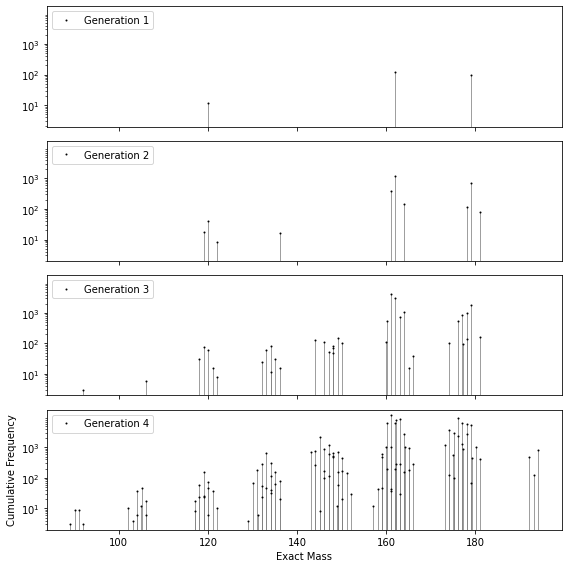

In [77]:
fig, axes = plt.subplots(4, figsize=(8,8), sharex=True, sharey=True)
#fig.suptitle("Mass spectra of the model glucose reaction network", y=0.91)

# Plot exact wt vs. number of compounds
with open('./MatchesStructIsomerFiles/GlucoseAmmMatchesStructIsomers.tsv') as output:
	lines = output.readlines()
	gen_smiles_dict = {}
	for line in lines:
		comps = line.split("\t")
		#print(comps)
		gen = int(comps[0][1])
		## Don't add G0, that's just initial reactants.
		if gen == 0:
			continue
		smiles_str = comps[1]
		if gen in gen_smiles_dict:
			gen_smiles_dict[gen].append(smiles_str)
		else:
			gen_smiles_dict[gen] = [smiles_str]
	
	# List of smiles upto Nth generation
	cumulative_list = []
	for gen, smiles_list in gen_smiles_dict.items():
		cumulative_list.extend(smiles_list)
	count = 0
	# use this for normalization later on
	highest_peak = -1
	for gen in range(len(gen_smiles_dict.keys()), 0, -1):
		exactwt_count = count_struct_isomers(cumulative_list)
		#print(exactwt_count)
		#plot_spectra(exactwt_count, gen)
		#plot_subplots(exactwt_count, gen)
		highest_peak = max(highest_peak, max(exactwt_count.values()))
		print(f'highest freq: {highest_peak}')
		plot_lollipop(exactwt_count, gen)
		#ax2 = fig.add_subplot(111)
		#plot_lollipop(exactwt_count, gen)
		cumulative_list = [x for x in cumulative_list if x not in gen_smiles_dict[gen]]
	#plt.legend(loc='upper left')
	plt.xlabel('Exact Mass')
	plt.ylabel('Cumulative Frequency')
	plt.tight_layout()
	#plt.savefig('struct_isomer_freq_gray.jpg', dpi=300)
	plt.show()